In [199]:
import math

# Import necessary libraries
import pandas as pd
from typing import Any, Tuple
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import csv 
import joblib
from dateutil import parser
import matplotlib.pyplot as plt
import seaborn as sns

In [200]:
df = pd.read_csv('dataset_train.csv')
pd.set_option('display.max_columns', None)

In [201]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44207 entries, 0 to 44206
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        44207 non-null  object 
 1   Customer_ID               44207 non-null  object 
 2   Month                     44207 non-null  object 
 3   Name                      44207 non-null  object 
 4   Age                       44207 non-null  object 
 5   SSN                       44207 non-null  object 
 6   Occupation                44207 non-null  object 
 7   Annual_Income             44207 non-null  object 
 8   Monthly_Inhand_Salary     44207 non-null  float64
 9   Num_Bank_Accounts         44207 non-null  int64  
 10  Num_Credit_Card           44207 non-null  int64  
 11  Interest_Rate             44207 non-null  int64  
 12  Num_of_Loan               44207 non-null  object 
 13  Type_of_Loan              44207 non-null  object 
 14  Delay_

In [202]:
samples = len(df)
avg_debt = df[df['Credit_Utilization_Ratio'] > 25]['Monthly_Inhand_Salary'].mean()
avg_debt = int(avg_debt)
unique_months = df['Month'].nunique()
ssn_count = df[df['SSN'].astype(str).str.endswith('20')]['SSN'].nunique()

In [203]:
task1df = pd.DataFrame({
    'Samples': [samples],
    'Avg_Debt': [avg_debt],
    'Unique_Months': [unique_months],
    'SSN_Count': [ssn_count]
})

task1df.to_csv("output_1.csv", index=False)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44207 entries, 0 to 44206
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        44207 non-null  object 
 1   Customer_ID               44207 non-null  object 
 2   Month                     44207 non-null  object 
 3   Name                      44207 non-null  object 
 4   Age                       44207 non-null  object 
 5   SSN                       44207 non-null  object 
 6   Occupation                44207 non-null  object 
 7   Annual_Income             44207 non-null  object 
 8   Monthly_Inhand_Salary     44207 non-null  float64
 9   Num_Bank_Accounts         44207 non-null  int64  
 10  Num_Credit_Card           44207 non-null  int64  
 11  Interest_Rate             44207 non-null  int64  
 12  Num_of_Loan               44207 non-null  object 
 13  Type_of_Loan              44207 non-null  object 
 14  Delay_

In [205]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x6762,CUS_0x6fe2,January,Schnurra,25,164-17-6558,Accountant,62214.36,4997.530000,9,7,19,9,"Credit-Builder Loan, Student Loan, Mortgage Lo...",58,20,1.05,8.0,_,2892.91,31.737712,13 Years and 10 Months,Yes,339.971582,216.583807190171,High_spent_Small_value_payments,203.19761100877272,-1
1,0x18b64,CUS_0xb13c,July,Jennifert,33,528-06-6283,_______,14613.65,1334.804167,8,583,22,6,"Personal Loan, Credit-Builder Loan, Personal L...",20,16,9.63,9.0,Bad,2882.07,27.414562,2 Years and 3 Months,Yes,67.975819,57.54453501725725,High_spent_Small_value_payments,267.96006258969163,0
2,0xb8d5,CUS_0xa0c3,August,Chanf,56,355-23-1301,Lawyer,101112.6,8600.050000,8,6,4,2,"Auto Loan, and Mortgage Loan",18,20,1.42,2.0,Good,399.49,36.516160,29 Years and 3 Months,No,143.856735,132.07082261639974,High_spent_Large_value_payments,824.0774428659337,1
3,0x2ec3,CUS_0x6732,February,alazsh,50,060-69-0738,Journalist,140390.32,11888.193333,5,2,4,3,"Credit-Builder Loan, Home Equity Loan, and Pay...",3,0,4.67,2.0,Good,1423.23,36.955252,30 Years and 9 Months,No,182.160424,133.2130344228415,High_spent_Medium_value_payments,1123.4458751336915,1
4,0x1b36,CUS_0x8c69,January,Toonkelf,24,070-07-9414,Musician,20188.02,1851.335000,4,3,6,3,"Mortgage Loan, Student Loan, and Mortgage Loan",10,5,1.31,0.0,_,399.92,28.542585,20 Years and 2 Months,No,25.580281,147.63621347336863,Low_spent_Large_value_payments,281.91700571081503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44202,0x156b4,CUS_0x36f2,July,Phil Wahbag,40,661-06-7195,Scientist,15366.215,996.517917,4,4,15,1,Auto Loan,24,13,8.58,0.0,Standard,189.59,33.137150,29 Years and 7 Months,No,9.091012,73.95678949855329,Low_spent_Small_value_payments,306.6039898643759,0
44203,0x4f29,CUS_0x664c,April,Lorenzim,19,482-10-4462,Doctor,72125.2,6094.433333,3,5,12,2,"Debt Consolidation Loan, and Home Equity Loan",7,19,9.52,6.0,_,95.23,25.693600,19 Years and 10 Months,Yes,84.489296,__10000__,High_spent_Large_value_payments,689.5478846629123,0
44204,0x18d58,CUS_0x75ba,March,Amani,32,676-38-0279,Writer,20723.8,1611.983333,7,9,23,6,"Payday Loan, Credit-Builder Loan, Debt Consoli...",60,26,18.0,7.0,Bad,4394.08,29.059281,12 Years and 0 Months,NM,95.605958,196.9927524615952,Low_spent_Small_value_payments,158.59962266572833,-1
44205,0x3441,CUS_0x7047,April,Alexeix,18,560-15-2864,Teacher,16532.33,1416.694167,5,6,18,7,"Auto Loan, Personal Loan, Personal Loan, Credi...",25,12,22.01,8.0,Standard,2551.12,23.790906,10 Years and 11 Months,Yes,52.680068,89.85531876668489,Low_spent_Large_value_payments,269.13403001424274,0


In [206]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')
df['Changed_Credit_Limit'] =  pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce')
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')
df_cleaned = df.dropna()

In [207]:
df_cleaned

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x6762,CUS_0x6fe2,January,Schnurra,25.0,164-17-6558,Accountant,62214.360,4997.530000,9,7,19,9.0,"Credit-Builder Loan, Student Loan, Mortgage Lo...",58,20.0,1.05,8.0,_,2892.91,31.737712,13 Years and 10 Months,Yes,339.971582,216.583807,High_spent_Small_value_payments,203.197611,-1
1,0x18b64,CUS_0xb13c,July,Jennifert,33.0,528-06-6283,_______,14613.650,1334.804167,8,583,22,6.0,"Personal Loan, Credit-Builder Loan, Personal L...",20,16.0,9.63,9.0,Bad,2882.07,27.414562,2 Years and 3 Months,Yes,67.975819,57.544535,High_spent_Small_value_payments,267.960063,0
2,0xb8d5,CUS_0xa0c3,August,Chanf,56.0,355-23-1301,Lawyer,101112.600,8600.050000,8,6,4,2.0,"Auto Loan, and Mortgage Loan",18,20.0,1.42,2.0,Good,399.49,36.516160,29 Years and 3 Months,No,143.856735,132.070823,High_spent_Large_value_payments,824.077443,1
3,0x2ec3,CUS_0x6732,February,alazsh,50.0,060-69-0738,Journalist,140390.320,11888.193333,5,2,4,3.0,"Credit-Builder Loan, Home Equity Loan, and Pay...",3,0.0,4.67,2.0,Good,1423.23,36.955252,30 Years and 9 Months,No,182.160424,133.213034,High_spent_Medium_value_payments,1123.445875,1
4,0x1b36,CUS_0x8c69,January,Toonkelf,24.0,070-07-9414,Musician,20188.020,1851.335000,4,3,6,3.0,"Mortgage Loan, Student Loan, and Mortgage Loan",10,5.0,1.31,0.0,_,399.92,28.542585,20 Years and 2 Months,No,25.580281,147.636213,Low_spent_Large_value_payments,281.917006,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44199,0x1c69e,CUS_0x1be4,January,"""Silviaz",22.0,226-81-3945,Mechanic,28491.460,2273.288333,9,7,25,7.0,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",49,21.0,12.60,10.0,_,3603.74,28.495065,6 Years and 4 Months,Yes,127.884971,136.036755,Low_spent_Small_value_payments,253.407108,0
44201,0x11bcf,CUS_0x5262,February,Bhaswatit,32.0,541-53-3205,Developer,78339.660,6562.305000,3,4,18,-100.0,"Credit-Builder Loan, and Not Specified",18,15.0,6.66,6.0,Standard,285.36,25.367653,18 Years and 11 Months,No,87.234208,151.749245,High_spent_Large_value_payments,657.247047,0
44202,0x156b4,CUS_0x36f2,July,Phil Wahbag,40.0,661-06-7195,Scientist,15366.215,996.517917,4,4,15,1.0,Auto Loan,24,13.0,8.58,0.0,Standard,189.59,33.137150,29 Years and 7 Months,No,9.091012,73.956789,Low_spent_Small_value_payments,306.603990,0
44204,0x18d58,CUS_0x75ba,March,Amani,32.0,676-38-0279,Writer,20723.800,1611.983333,7,9,23,6.0,"Payday Loan, Credit-Builder Loan, Debt Consoli...",60,26.0,18.00,7.0,Bad,4394.08,29.059281,12 Years and 0 Months,NM,95.605958,196.992752,Low_spent_Small_value_payments,158.599623,-1


In [208]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33441 entries, 0 to 44205
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        33441 non-null  object 
 1   Customer_ID               33441 non-null  object 
 2   Month                     33441 non-null  object 
 3   Name                      33441 non-null  object 
 4   Age                       33441 non-null  float64
 5   SSN                       33441 non-null  object 
 6   Occupation                33441 non-null  object 
 7   Annual_Income             33441 non-null  float64
 8   Monthly_Inhand_Salary     33441 non-null  float64
 9   Num_Bank_Accounts         33441 non-null  int64  
 10  Num_Credit_Card           33441 non-null  int64  
 11  Interest_Rate             33441 non-null  int64  
 12  Num_of_Loan               33441 non-null  float64
 13  Type_of_Loan              33441 non-null  object 
 14  Delay_from_

In [209]:
y = df_cleaned['Credit_Score']
cols_to_drop = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']
X = df_cleaned.drop(cols_to_drop, axis = 1)

In [210]:
X

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,25.0,62214.360,4997.530000,9,7,19,9.0,58,20.0,1.05,8.0,2892.91,31.737712,339.971582,216.583807,203.197611
1,33.0,14613.650,1334.804167,8,583,22,6.0,20,16.0,9.63,9.0,2882.07,27.414562,67.975819,57.544535,267.960063
2,56.0,101112.600,8600.050000,8,6,4,2.0,18,20.0,1.42,2.0,399.49,36.516160,143.856735,132.070823,824.077443
3,50.0,140390.320,11888.193333,5,2,4,3.0,3,0.0,4.67,2.0,1423.23,36.955252,182.160424,133.213034,1123.445875
4,24.0,20188.020,1851.335000,4,3,6,3.0,10,5.0,1.31,0.0,399.92,28.542585,25.580281,147.636213,281.917006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44199,22.0,28491.460,2273.288333,9,7,25,7.0,49,21.0,12.60,10.0,3603.74,28.495065,127.884971,136.036755,253.407108
44201,32.0,78339.660,6562.305000,3,4,18,-100.0,18,15.0,6.66,6.0,285.36,25.367653,87.234208,151.749245,657.247047
44202,40.0,15366.215,996.517917,4,4,15,1.0,24,13.0,8.58,0.0,189.59,33.137150,9.091012,73.956789,306.603990
44204,32.0,20723.800,1611.983333,7,9,23,6.0,60,26.0,18.00,7.0,4394.08,29.059281,95.605958,196.992752,158.599623


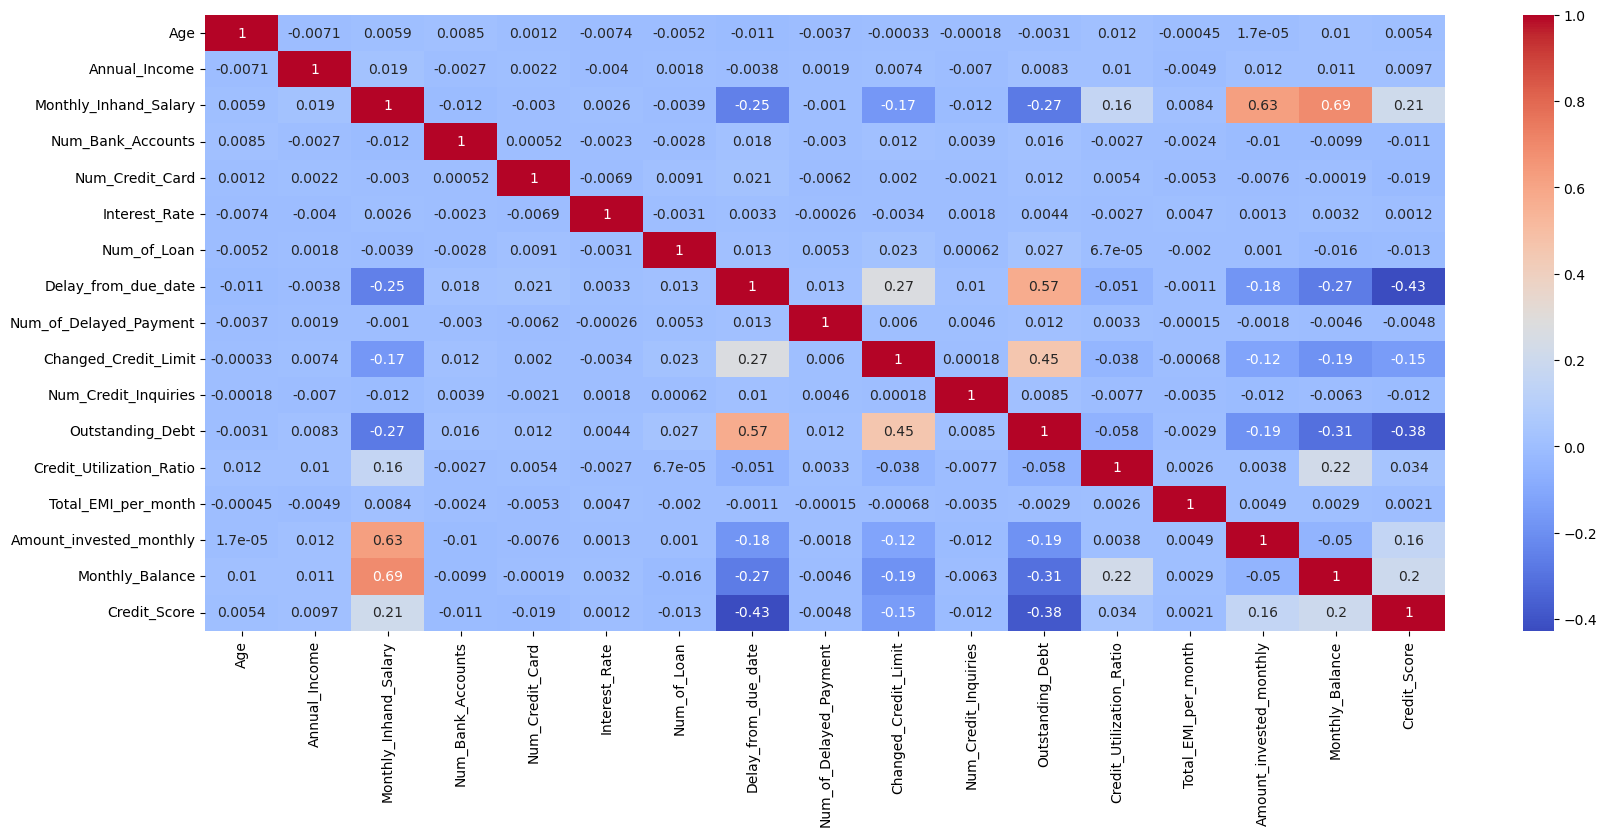

In [211]:
pd.concat([X, y], axis=1).corr()
plt.figure(figsize=(20, 8))
sns.heatmap(pd.concat([X, y], axis=1).corr(), annot=True, cmap="coolwarm")
plt.show()

In [212]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()  # supports multi-class classification by default
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.75      0.75      0.75      2092
           0       0.76      0.80      0.78      3554
           1       0.71      0.59      0.65      1043

    accuracy                           0.75      6689
   macro avg       0.74      0.71      0.73      6689
weighted avg       0.75      0.75      0.75      6689



In [213]:
df_eval = pd.read_csv('dataset_eval.csv')

In [214]:
df_eval

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1c2a8,CUS_0xa137,July,Bartza,28,012-08-7560,Engineer,101066.4_,8547.200000,4,4,12,2,"Personal Loan, and Home Equity Loan",24,8,12.35,6.0,Standard,1461.27,42.758858,27 Years and 9 Months,Yes,95.706765,57.424265300077685,High_spent_Large_value_payments,941.5889698361252
1,0x20a90,CUS_0xc1a6,July,Rr,32,#F%$D@*&8,Manager,12805.5,1188.125000,4,7,20,2,"Mortgage Loan, and Auto Loan",24,19,1.92,4.0,Standard,1376.62,38.428253,29 Years and 10 Months,No,16.095339,27.8631850898842,!@9#%8,314.8539762250388
2,0x1e9a4,CUS_0x1f04,March,rob,37,387-02-5364,Manager,60770.22,4924.185000,8,4,15,4,"Mortgage Loan, Personal Loan, Not Specified, a...",11,13,1.36,6.0,Standard,176.02,36.386528,28 Years and 3 Months,No,190.274574,502.489621875097,Low_spent_Small_value_payments,89.65430429648285
3,0x1a22,CUS_0x4af0,January,Nicolacih,18,397-45-5329,Developer,27070.07,2518.839167,7,3,11,4,"Home Equity Loan, Credit-Builder Loan, Student...",12,15,5.68,1.0,Standard,919.76,28.555850,29 Years and 2 Months,No,73.233318,76.31458794990105,High_spent_Small_value_payments,362.33601023741403
4,0x218ce,CUS_0x5b90,May,Nick Edwardsa,42,341-11-8430,Architect,98992.92,8207.410000,5,7,13,3,"Not Specified, Not Specified, and Debt Consoli...",8,10,2.7200000000000006,4.0,_,441.72,36.329658,19 Years and 3 Months,Yes,240.811904,425.44022223241797,Low_spent_Small_value_payments,444.4888737539801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8836,0x1cfad,CUS_0x7dc6,April,Scuffhamw,32,995-81-3178,Lawyer,127760.4,10721.700000,2,7,11,-100,"Payday Loan, Home Equity Loan, Auto Loan, and ...",8,1,-2.35,3.0,Good,443.32,32.338585,16 Years and 1 Months,No,373.921956,214.93575355938071,High_spent_Medium_value_payments,733.3122902740181
8837,0x383a,CUS_0x4cfd,January,Edwinp,37,776-43-3476,Engineer,75650.04,6134.170000,10,6,15,6,"Personal Loan, Personal Loan, Home Equity Loan...",19,19,28.83,8.0,Bad,2525.56,41.163070,6 Years and 4 Months,Yes,327.534571,259.8931241040983,High_spent_Medium_value_payments,275.9893048298276
8838,0xbf1c,CUS_0x7b38,July,Wayne Coleg,30,738-27-7124,Musician,101696.19,8432.682500,5,7,10,2,"Not Specified, and Student Loan",30,18,7.53,1.0,Standard,545.89,33.269084,27 Years and 1 Months,No,111.976512,650.4272380725963,Low_spent_Small_value_payments,370.86449996166505
8839,0xd309,CUS_0x4425,August,Andreasy,15,821-88-7412,Doctor,59788.89,5053.407500,9,9,20,7,"Student Loan, Student Loan, Debt Consolidation...",41,25,18.13,10.0,Bad,3547.66,36.432540,7 Years and 5 Months,Yes,188.578713,274.1835571537102,Low_spent_Small_value_payments,332.57847959719237


In [215]:
def clean_dataframe(dfr):
    dfr['Age'] = pd.to_numeric(df['Age'], errors='coerce')
    dfr['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')
    dfr['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')
    dfr['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')
    dfr['Changed_Credit_Limit'] =  pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')
    dfr['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce')
    dfr['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')
    dfr['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')
    dfr.fillna(dfr.mean(numeric_only=True), inplace=True)
    

In [216]:
clean_dataframe(df_eval)

In [236]:
df_eval

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1c2a8,CUS_0xa137,July,Bartza,25.000000,012-08-7560,Engineer,62214.36,8547.200000,4,4,12,9.000000,"Personal Loan, and Home Equity Loan",24,20.00000,1.05,6.0,Standard,2892.91,42.758858,27 Years and 9 Months,Yes,95.706765,216.583807,High_spent_Large_value_payments,203.197611
1,0x20a90,CUS_0xc1a6,July,Rr,33.000000,#F%$D@*&8,Manager,14613.65,1188.125000,4,7,20,6.000000,"Mortgage Loan, and Auto Loan",24,16.00000,9.63,4.0,Standard,2882.07,38.428253,29 Years and 10 Months,No,16.095339,57.544535,!@9#%8,267.960063
2,0x1e9a4,CUS_0x1f04,March,rob,56.000000,387-02-5364,Manager,101112.60,4924.185000,8,4,15,2.000000,"Mortgage Loan, Personal Loan, Not Specified, a...",11,20.00000,1.42,6.0,Standard,399.49,36.386528,28 Years and 3 Months,No,190.274574,132.070823,Low_spent_Small_value_payments,824.077443
3,0x1a22,CUS_0x4af0,January,Nicolacih,50.000000,397-45-5329,Developer,140390.32,2518.839167,7,3,11,3.000000,"Home Equity Loan, Credit-Builder Loan, Student...",12,0.00000,4.67,1.0,Standard,1423.23,28.555850,29 Years and 2 Months,No,73.233318,133.213034,High_spent_Small_value_payments,1123.445875
4,0x218ce,CUS_0x5b90,May,Nick Edwardsa,24.000000,341-11-8430,Architect,20188.02,8207.410000,5,7,13,3.000000,"Not Specified, Not Specified, and Debt Consoli...",8,5.00000,1.31,4.0,_,399.92,36.329658,19 Years and 3 Months,Yes,240.811904,147.636213,Low_spent_Small_value_payments,281.917006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8836,0x1cfad,CUS_0x7dc6,April,Scuffhamw,117.194454,995-81-3178,Lawyer,17096.25,10721.700000,2,7,11,3.657133,"Payday Loan, Home Equity Loan, Auto Loan, and ...",8,16.00000,29.72,3.0,Good,2733.27,32.338585,16 Years and 1 Months,No,373.921956,133.823908,High_spent_Medium_value_payments,249.087284
8837,0x383a,CUS_0x4cfd,January,Edwinp,26.000000,776-43-3476,Engineer,22709.94,6134.170000,10,6,15,4.000000,"Personal Loan, Personal Loan, Home Equity Loan...",19,16.00000,11.59,8.0,Bad,994.73,41.163070,6 Years and 4 Months,Yes,327.534571,175.929802,High_spent_Medium_value_payments,254.830190
8838,0xbf1c,CUS_0x7b38,July,Wayne Coleg,27.000000,738-27-7124,Musician,16538.39,8432.682500,5,7,10,7.000000,"Not Specified, and Student Loan",30,30.64156,31.77,1.0,Standard,3843.16,33.269084,27 Years and 1 Months,No,111.976512,114.676349,Low_spent_Small_value_payments,228.301683
8839,0xd309,CUS_0x4425,August,Andreasy,32.000000,821-88-7412,Doctor,14126.68,5053.407500,9,9,20,4.000000,"Student Loan, Student Loan, Debt Consolidation...",41,16.00000,15.44,10.0,Bad,1673.64,36.432540,7 Years and 5 Months,Yes,188.578713,35.291591,Low_spent_Small_value_payments,325.088635


In [240]:
cols_to_drop = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour']
X_final = df_eval.drop(cols_to_drop, axis = 1)

In [244]:
y_preds_final = model.predict(X_final)

In [249]:
output = pd.DataFrame({'ID': df_eval.ID, 'Credit_Score': y_preds_final})
output.to_csv('output_2.csv', index=False)